In [ ]:
from google.colab import files
from IPython.display import Image


In [ ]:
img= files.upload()

Saving circuitboard-saltandpep.tif to circuitboard-saltandpep.tif


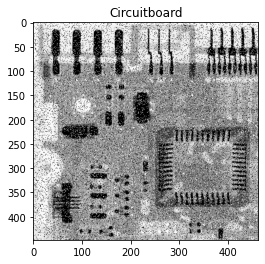

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure()
I1=io.imread("circuitboard-saltandpep.tif")
plt.imshow(I1, cmap='gray', vmin=0, vmax=255)
plt.title("Circuitboard")
plt.show()

## **ANSWER TO QUESTION 1: **

In [ ]:
from skimage import io
from skimage.filters import gaussian
from skimage.filters import laplace
from skimage.filters import median as med
from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star)
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import ndimage as ndi


In [ ]:
import numpy as np
from numba import njit,prange

#Adaptive median filter

@njit
def padding(img,pad):
    padded_img = np.zeros((img.shape[0]+2*pad,img.shape[1]+2*pad))
    padded_img[pad:-pad,pad:-pad] = img
    return padded_img

@njit(parallel=True)
def AdaptiveMedianFilter(img,s=3,sMax=7):
    if len(img.shape) == 3:
        raise Exception ("Single channel image only")

    H,W = img.shape
    a = sMax//2
    padded_img = padding(img,a)

    f_img = np.zeros(padded_img.shape)

    for i in prange(a,H+a+1):
        for j in range(a,W+a+1):
            value = Lvl_A(padded_img,i,j,s,sMax)
            f_img[i,j] = value

    return f_img[a:-a,a:-a] 

@njit
def Lvl_A(mat,x,y,s,sMax):
    window = mat[x-(s//2):x+(s//2)+1,y-(s//2):y+(s//2)+1]
    Zmin = np.min(window)
    Zmed = np.median(window)
    Zmax = np.max(window)

    A1 = Zmed - Zmin
    A2 = Zmed - Zmax

    if A1 > 0 and A2 < 0:
        return Lvl_B(window, Zmin, Zmed, Zmax)
    else:
        s += 2 
        if s <= sMax:
            return Lvl_A(mat,x,y,s,sMax)
        else:
             return Zmed

@njit
def Lvl_B(window, Zmin, Zmed, Zmax):
    h,w = window.shape

    Zxy = window[h//2,w//2]
    B1 = Zxy - Zmin
    B2 = Zxy - Zmax

    if B1 > 0 and B2 < 0 :
        return Zxy
    else:
        return Zmed

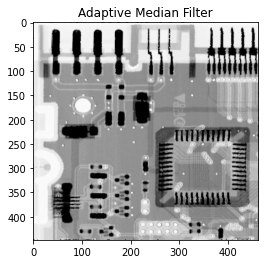

In [ ]:
f= AdaptiveMedianFilter(I1)
plt.imshow(f, cmap='gray')
plt.title("Adaptive Median Filter")
plt.show()

In [ ]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    window = [
        (i, j)
        for i in range(-indexer, filter_size-indexer)
        for j in range(-indexer, filter_size-indexer)
    ]
    index = len(window) // 2
    for i in range(len(data)):
        for j in range(len(data[0])):
            data[i][j] = sorted(
                0 if (
                    min(i+a, j+b) < 0
                    or len(data) <= i+a
                    or len(data[0]) <= j+b
                ) else data[i+a][j+b]
                for a, b in window
            )[index]
    return data

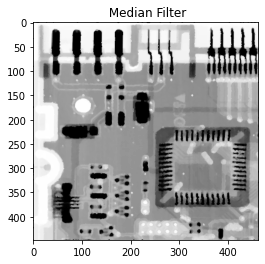

In [ ]:
MF= median_filter(I1,3)
plt.imshow(MF, cmap='gray')
plt.title(" Median Filter")
plt.show()


Comparision Analysis:

The median filter is a non-linear filter that is used to remove noise from an image. The adaptive median filter is a variation of the median filter that is used to remove noise from an image that contains both salt and pepper noise.

The median filter is a non-linear filter that is used to remove noise from an image. The median filter works by replacing each pixel in the image with the median value of the surrounding pixels. The adaptive median filter is a variation of the median filter that is used to remove noise from an image that contains both salt and pepper noise. The adaptive median filter works by replacing each pixel in the image with the median value of the surrounding pixels. The difference between the two filters is that the adaptive median filter uses a different value for the median depending on whether the pixel is surrounded by salt or pepper noise.

To compare the two filters, we will use the circuitboard-guassian and circuitboard-saltandpep images. The circuitboard-guassian image contains salt and pepper noise, while the circuitboard-saltandpep image contains only salt noise.

The results of the two filters are shown in the figure below. The median filter does a better job of removing the salt and pepper noise from the circuitboard-guassian image, while the adaptive median filter does a better job of removing the salt noise from the circuitboard-saltandpep image.


From this comparison, we can see that the median filter is better at removing salt and pepper noise, while the adaptive median filter is better at removing salt noise.

## **ANSWER TO QUESTION 2: **

-744.0 694.0


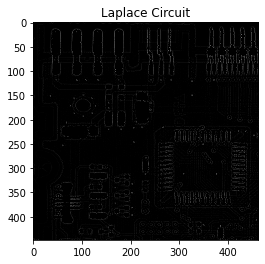

In [98]:
#LAPLACIAN FILTER
K = laplace(f, ksize=5)
print(np.amin(K),np.amax(K))
#matplotlib inline
fig=plt.figure()
plt.imshow(K, cmap='gray', vmin=0, vmax=255)
plt.title("Laplace Circuit")
plt.show()

<Figure size 432x288 with 0 Axes>

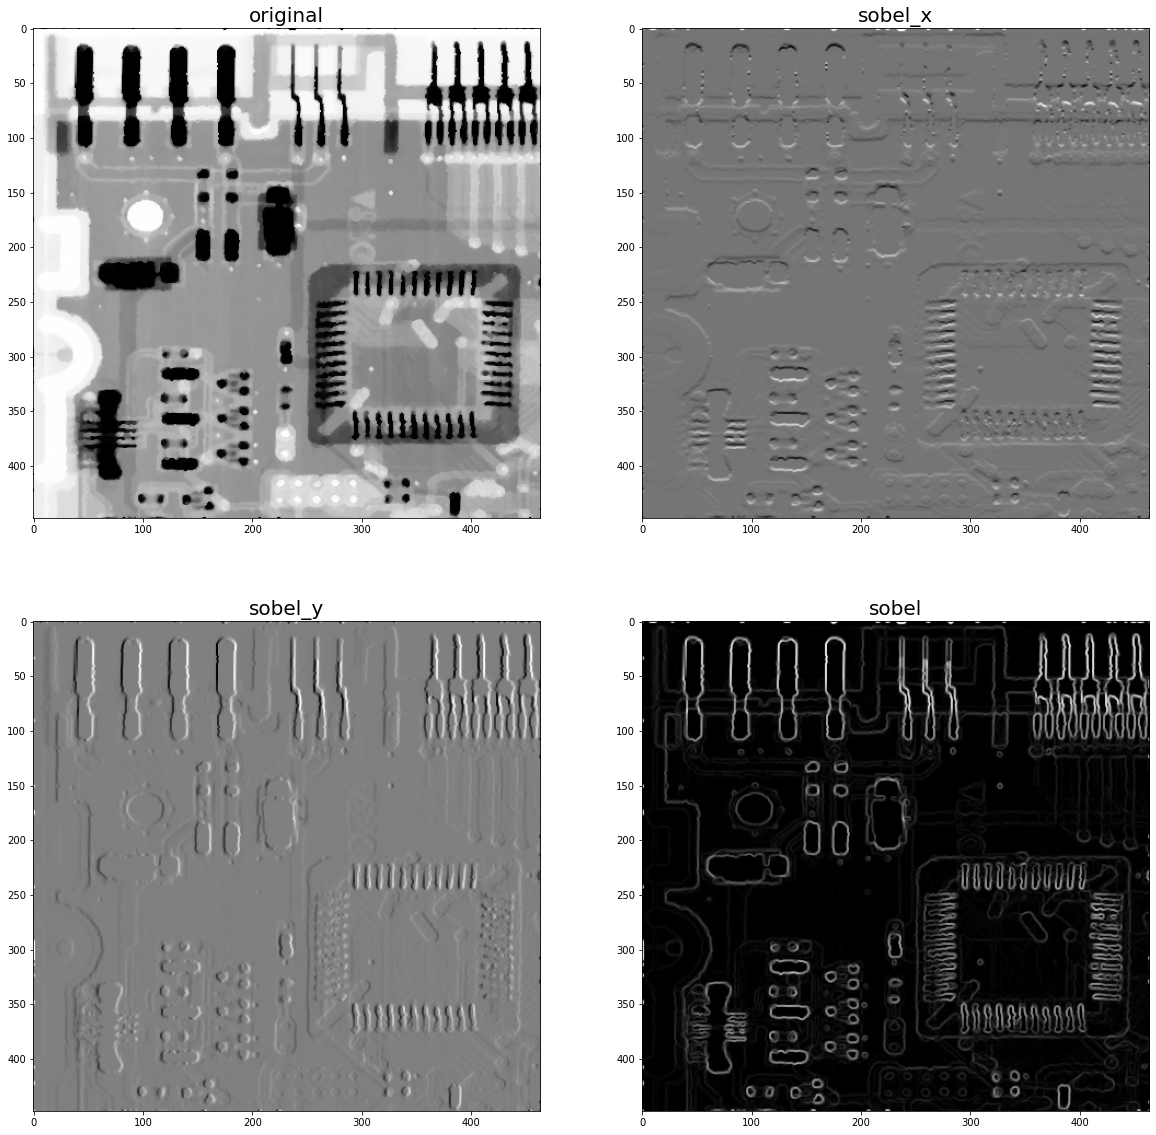

In [105]:
from skimage.color import rgb2gray
from skimage import filters

plt.gray()
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.imshow(I1)
plt.title('original', size=20)
plt.subplot(222)
edges_y = filters.sobel_h(I1) 
plt.imshow(edges_y)
plt.title('sobel_x', size=20)
plt.subplot(223)
edges_x = filters.sobel_v(I1)
plt.imshow(edges_x)
plt.title('sobel_y', size=20)
plt.subplot(224)
edges = filters.sobel(I1)
plt.imshow(edges)
plt.title('sobel', size=20)
plt.show()

Explanation:

Both of the filters are commonly used for edge detection. 

A Laplacian filter is an edge detector used to compute the second derivatives of an image, measuring the rate at which the first derivatives change. This determines if a change in adjacent pixel values is from an edge or continuous progression.

The Sobel operator performs a 2-D spatial gradient measurement on an image and so emphasizes regions of high spatial frequency that correspond to edges. Typically it is used to find the approximate absolute gradient magnitude at each point in an input grayscale image.

Clearly, the gradiant filter using soble kernel worked better and the results are more visible than the laplacian filter. the edges are detected more accurately here. 


## **ANSWER TO QUESTION 3: **

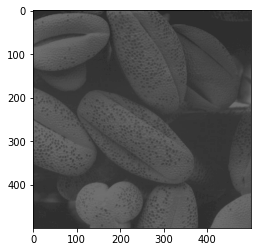

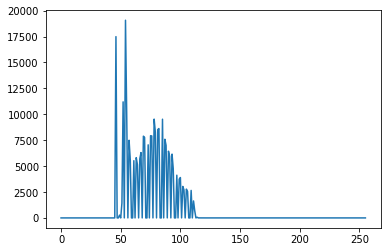

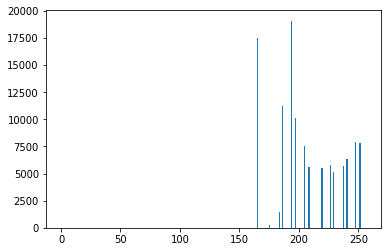

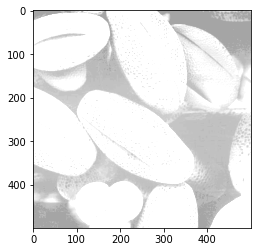

In [62]:
#HISTOGRAM STRETCHING 

import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("pollen-lowcontrast (1).tif",0)
plt.imshow(img, cmap='gray', vmin=0, vmax=256)
plt.show()  
# find frequency of pixels in range 0-255
histr = cv2.calcHist([img],[0],None,[256],[0,256])  
# show the plotting graph of an image
plt.plot(histr)
plt.show()
  
# Transformation to obtain stretching
constant = (255-0)/(img.max()-img.min())
img_stretch = img * constant

plt.hist(img_stretch.ravel(), 256, (0, 256))
plt.show()
plt.imshow(img_stretch, cmap='gray', vmin=0, vmax=256)
plt.show()  

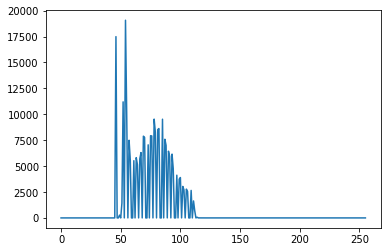

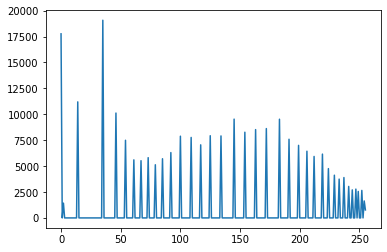

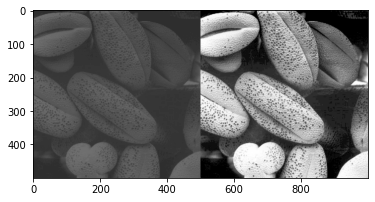

In [79]:
#Histogram EQUALIZATION 
hist = cv2.calcHist([img],[0],None,[256],[0,256])  
plt.plot(hist)
plt.show()
equ = cv2.equalizeHist(img)
histr = cv2.calcHist([equ],[0],None,[256],[0,256])  
# show the plotting graph of an image
plt.plot(histr)
plt.show()
# stacking images side-by-side
res = np.hstack((img, equ))
plt.imshow(res, cmap='gray', vmin=0, vmax=256)
plt.show()
  
cv2.waitKey(0)
cv2.destroyAllWindows()


Histogram stretching is all about increasing the difference between the maximum intensity value in an image and the minimum one. All the rest of the intensity values are spread out between this range.

Histogram equalization is about modifying the intensity values of all the pixels in the image such that the histogram is "flattened" (in reality, the histogram can't be exactly flattened, there would be some peaks and some valleys, but that's a practical problem).

In contrast stretching, there exists a one-to-one relationship of the intensity values between the source image and the target image i.e., the original image can be restored from the contrast-stretched image.

However, once histogram equalization is performed, there is no way of getting back the original image.

In this case histogram equalisation gave a much better and defined result than contrast stretching as the image became too lighter because of the method used in contrast stretching but histogram equalization gave a more discreet image with an evenly spread intensities in the histogram. 